In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
def flatten(matrix):
    flatten_array = []
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            flatten_array = append(flatten_array, matrix[i][j])
    return flatten_array

def to_matrix(flatten_array, row_len):
    if len(flatten_array) % row_len != 0:
        raise ValueError(f"invalid row_len value: len(arr) = {len(flatten_array)}, row_len = {row_len}")
    matrix = [[] for i in range(len(flatten_array) // row_len)]
    for i in range(0, len(matrix)):
        for j in range(row_len):
            matrix[i] = append(matrix[i], flatten_array[i*row_len + j])
    return matrix

def append(arr, *els):
    new_arr = [0] * (len(arr) + len(els))
    for i in range(len(arr)):
        new_arr[i] = arr[i]
    for i in range(len(els)):
        new_arr[len(arr) + i] = els[i]
    return new_arr

def array_equal(arr1, arr2):
    if len(arr1) != len(arr2):
        return False
    if len(arr1) == 0:
        return True
    for i in range(len(arr1)):
        if arr1[i] != arr2[i]:
            return False
    return True

def binary_step(arr):
    result = []
    if len(arr) == 0:
        return result
    for i in range(len(arr)):
        if type(arr[i]) == list:
            tmp = []
            for j in range(len(arr[i])):
                tmp = append(tmp, step(arr[i][j]))
            result = append(result, tmp)
        else:
            result = append(result, step(arr[i]))
    return result

def step(el):
    if el >= 0:
        return 1
    return -1

def relu(arr):
    result = []
    if len(arr) == 0:
        return result
    for i in range(len(arr)):
        if type(arr[i]) == list:
            tmp = []
            for j in range(len(arr[i])):
                tmp = append(tmp, max(0, arr[i][j]))
            result = append(result, tmp)
        else:
            result = append(result, max(0, arr[i]))
    return result

def max(*els):
    if len(els) == 0:
        return None
    result = els[0]
    if len(els) == 1:
        return result
    for el in els[1:]:
        if el > result:
            result = el
    return result

def deepcopy(arr):
    if len(arr) == 0:
        return []
    if type(arr[0]) != list:
        new_arr = [0] * len(arr)
        for i in range(len(arr)):
            new_arr[i] = arr[i]
    else:
        new_arr = []
        for i in range(len(arr)):
            new_arr = append(new_arr, [0] * len(arr[i]))
            for j in range(len(arr[i])):
                new_arr[i][j] = arr[i][j]
    return new_arr

In [56]:
def draw_matrix(matrix):
    '''
    Отрисовка матрицы
    '''
    plt.imshow(matrix, cmap='hot')
    plt.show()

def zeros(row, col=0):
    if not col:
        return [0] * row
    return [[0] * row for j in range(col)]

def ones(row, col=0):
    if not col:
        return [1] * row
    return [[1] * row for j in range(col)]

def read_image_from_file(filename):
    '''
    Считывание матрицы из файла
    '''
    with open(filename, "r") as f:
        lines = f.readlines()
        res = zeros(8, 8)
        for i in range(len(lines)):
            tmp = []
            for s in list(lines[i]):
                if s == '\n':
                    continue
                if s == "*":
                    tmp = append(tmp, int(1))
                else:
                    tmp = append(tmp, int(-1))
            res[i] = tmp
        draw_matrix(res)
        return(res)

def hopfield_fit(flatten_images):
    '''
    Нахождение весовых коэффициентов синапсов для сети Хопфилда
    '''
    w = zeros(64, 64)
    for i in range(64):
        for j in range(64):
            s = 0
            for k in range(len(flatten_images)):
                s += flatten_images[k][i]* flatten_images[k][j]   
            w[i][j] = s
        w[i][i] = 0
    return w


def hopfield_restore_image(y_test, w):
    '''
    Построение изображения
    '''
    state = zeros(64)
    for j in range(64):
        s = 0
        for i in range(64):
            s += w[i][j] * y_test[i]
        state[j] = s
    return binary_step(state)

def hopfield_check(image, flatten_images):
    '''
    Проверка найден образ или нет
    '''
    for i in flatten_images:
        if array_equal(image, i):
            return True
    return False

def heming_fit(flatten_images):
    '''
    Нахождение весовых коэффициентов синапсов для сети Хеминга
    '''
    w = zeros(len(flatten_images), 64)
    for i in range(64):
        for j in range(len(flatten_images)):
            w[i][j] = float(flatten_images[j][i]) / 2
    return w

def init_layer(y, w):
    '''
    Инициализация нейронов 1-го слоя
    '''
    y_prev = zeros(len(flatten_images))
    T = ones(len(flatten_images))
    for i in range(len(T)):
        T[i] *= 64/2
    for i in range(len(y_prev)):
        for j in range(64):
            y_prev[i] += w[j][i] * y[j]
        y_prev[i] += T[i]
    return y_prev

def heming_restore_image(y_test, eps):
    '''
    Запуск сети Хеминга на новом изображении
    '''
    state = zeros(len(y_test))
    for i in range(len(y_test)):
        s = y_test[i]
        for j in range(len(y_test)):
            if i != j:
                s -= eps * y_test[j]
        state[i] = s
    return relu(state)

def heming_check(image):
    '''
    Проверка найден образ или нет
    '''
    counter = 0
    for x in image:
        if x > 0:
            counter += 1
    return counter == 1

Image 1


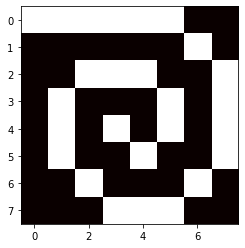


Image 2


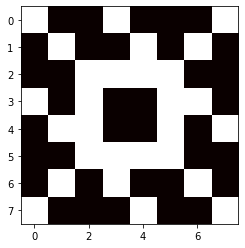


Image 3


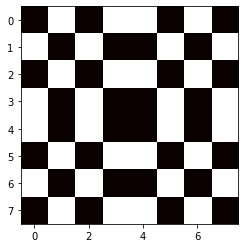


Image 4


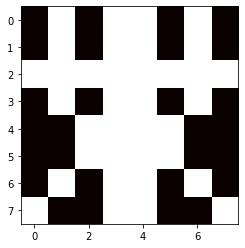

In [57]:
images = []
for i in range(1,5):
    filename = f"img{i}.txt"
    print(f"Image {i}")
    images = append(images, read_image_from_file(filename))
    print()

flatten_images = []
for image in images:
    flatten_images = append(flatten_images, flatten(image))

w_hopfield  = hopfield_fit(flatten_images)

FILE: test4.txt



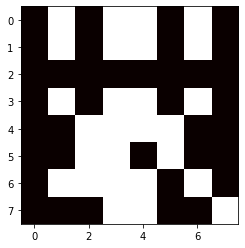

In [58]:
filename = f"test{4}.txt"
print(f"FILE: {filename}\n")
y_test = flatten(read_image_from_file(filename))
y = deepcopy(y_test)

stop
Образ найден в коллекции


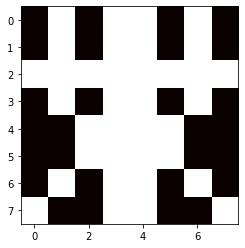

In [61]:
y_old = deepcopy(y)
y = hopfield_restore_image(y, w_hopfield)
if array_equal(y_old, y):
    print("stop")
    if hopfield_check(y, flatten_images):
        print('Образ найден в коллекции')
    else:
        print('Образ не найден в коллекции')
draw_matrix(to_matrix(y, 8))

In [62]:
w_heming = heming_fit(flatten_images)

FILE: test1.txt



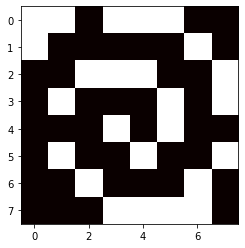

In [63]:
filename = f"test{1}.txt"
print(f"FILE: {filename}\n")
y_test = flatten(read_image_from_file(filename))
y = init_layer(deepcopy(y_test), w_heming)
eps = 1 / 9

In [68]:
y_old = deepcopy(y)
y = heming_restore_image(y, eps)
if array_equal(y_old, y):
    print("stop")
    if heming_check(y):
        print('Образ найден в коллекции')
    else:
        print('Образ не найден в коллекции')
print(y)

[35.9007603854426, 0, 0, 0]
